# FPC implimentation: Demo HLGF 2022


There are few things to notedown:

## Part I: Path, repo and docker and env file creation: you must do inside the docker-dev enviornment.

## Part II: Starting a fabric network: you can do inside or outside the dev-env).

## Part III: Interaction with network through CLI: you can do inside or outside the dev-env.



## PART - I

Provide path address

In [ ]:
export FPC_PATH=$GOPATH/src/github.com/hyperledger/fabric-private-chaincode

Clonning the go-support branch

In [ ]:
git clone -b go-support-preview --recursive https://github.com/hyperledger/fabric-private-chaincode.git $FPC_PATH
    

Once you have cloned the repository, to pull the docker image and start the development container execute the following:

In [ ]:
cd $FPC_PATH/utils/docker
make pull-dev 
make run-dev

If there is error then you can do the following by pulling the docker files


In [ ]:
cd $FPC_PATH
make -C $FPC_PATH/utils/docker pull

or you can build all required FPC componenet and run the intgration test using folloiwng commands

In [ ]:
cd $FPC_PATH
make

For docker based enviornment:     

In [ ]:
cd $FPC_PATH/utils/docker
make pull-dev 
make run-dev

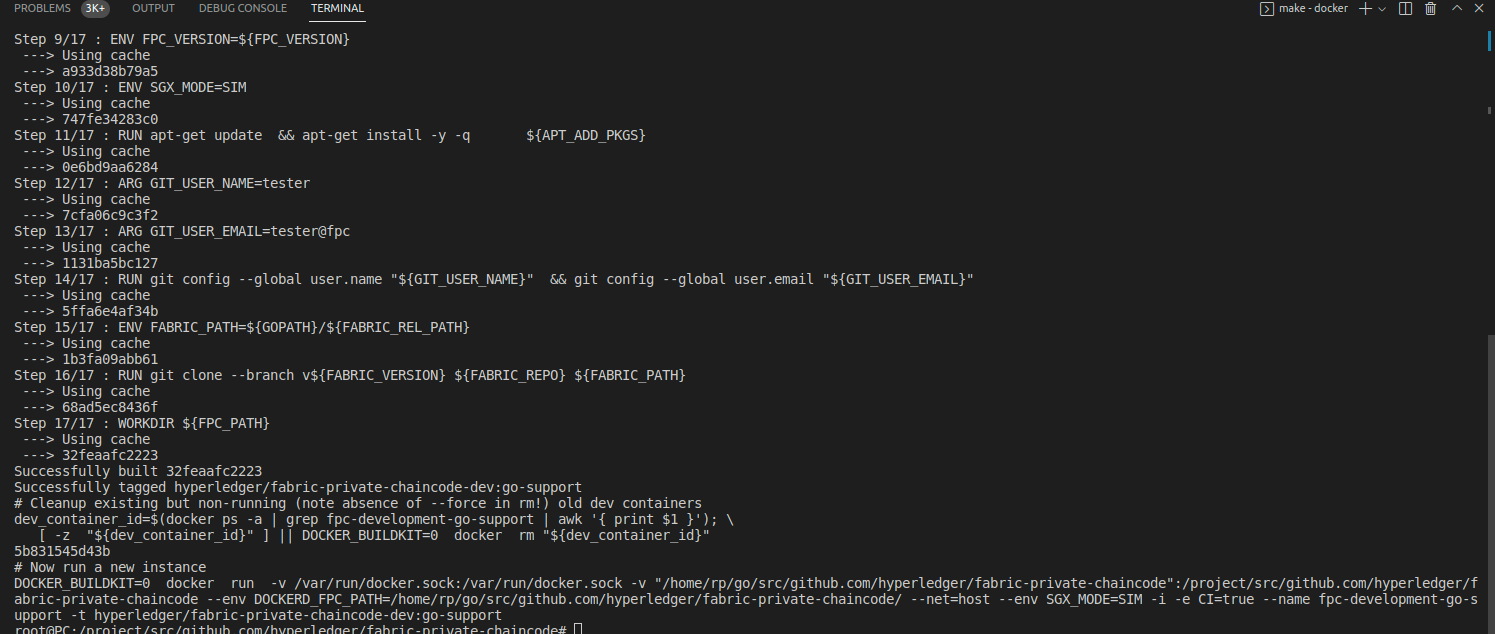

Once the development enviornment is running: now you can go the write the chaincode and build it usign the make command:
It is better to run the make inside the dev envionment.



Input
modification in main.go
modification in makefile


In [ ]:
assetChaincode, _ := contractapi.NewChaincode(&chaincode.SmartContract{})

chaincode := fpc.NewPrivateChaincode(assetChaincode)

Make sure you import followings: 
1. contract-api-go
2. ecc_go/chaincode
3. chaincode location

In [ ]:
"github.com/hyperledger/fabric-contract-api-go/contractapi"
fpc "github.com/hyperledger/fabric-private-chaincode/ecc_go/chaincode"
"github.com/hyperledger/fabric-samples/asset-transfer-basic/chaincode-go/chaincode"

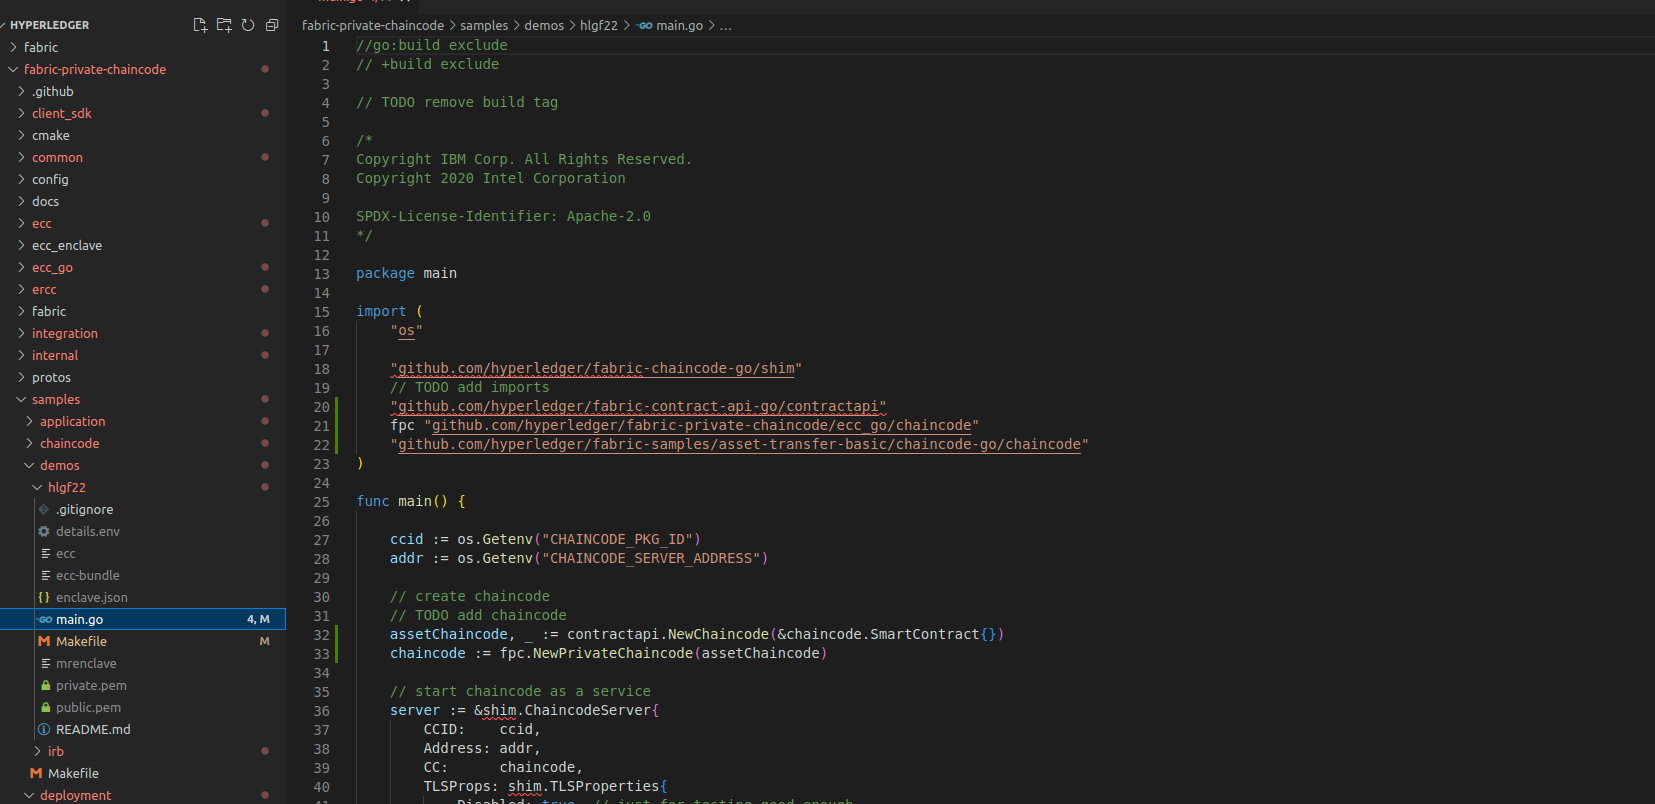

To build chaincode: use the docker dev envionrment

Set inside the Makefile.

In [ ]:
CC_NAME ?= fpc-basic-asset-transfer 

Then run the following command from the makefile location i.e. fabric-private-chaincode/samples/demos/hlgf22#

In [ ]:
go mod tidy
make


Once it is done then you will get following:

a. A docker image: fpc-basic-asset-transfer

b. enviornment variable: details.env

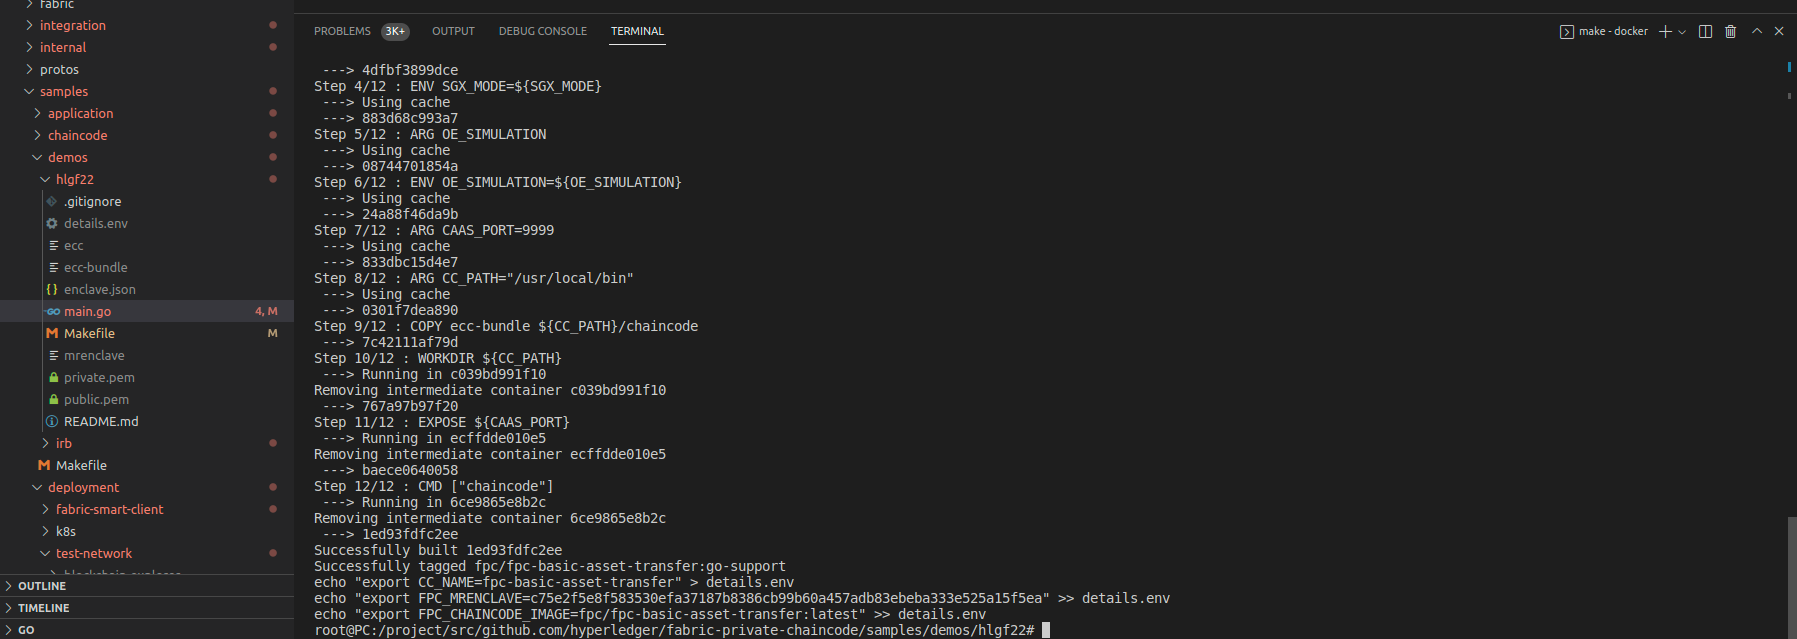

## PART - II

Here we use the the fabric-smart-client as network

Open a new terminal and firstly export the variable:



In [ ]:
export FPC_PATH=$GOPATH/src/github.com/hyperledger/fabric-private-chaincode


then go the fabric-smart-client directory



In [ ]:
cd $FPC_PATH/samples/deployment/fabric-smart-client/the-simple-testing-network


To run the Fabric network we need the Fabric binaries. We will use the following:

In [ ]:
make -C $FPC_PATH/fabric
export FAB_BINS=$FPC_PATH/fabric/_internal/bin

Go to 

In [ ]:
$FPC_PATH/samples/deployment/fabric-smart-client/the-simple-testing-network



Review the topology.go, which defines a simple Fabric network with two organizations. 
Note that we enable FPC by setting the chaincode name and the docker image. 
These information are in the details.env variable, we will source them here by:

In [ ]:
source $FPC_PATH/samples/demos/hlgf22/details.env

Run the network

In [ ]:
make run
// OR
go run . network start --path ./testdata

The network start which is defined in the topology.go will run and you will see the message:

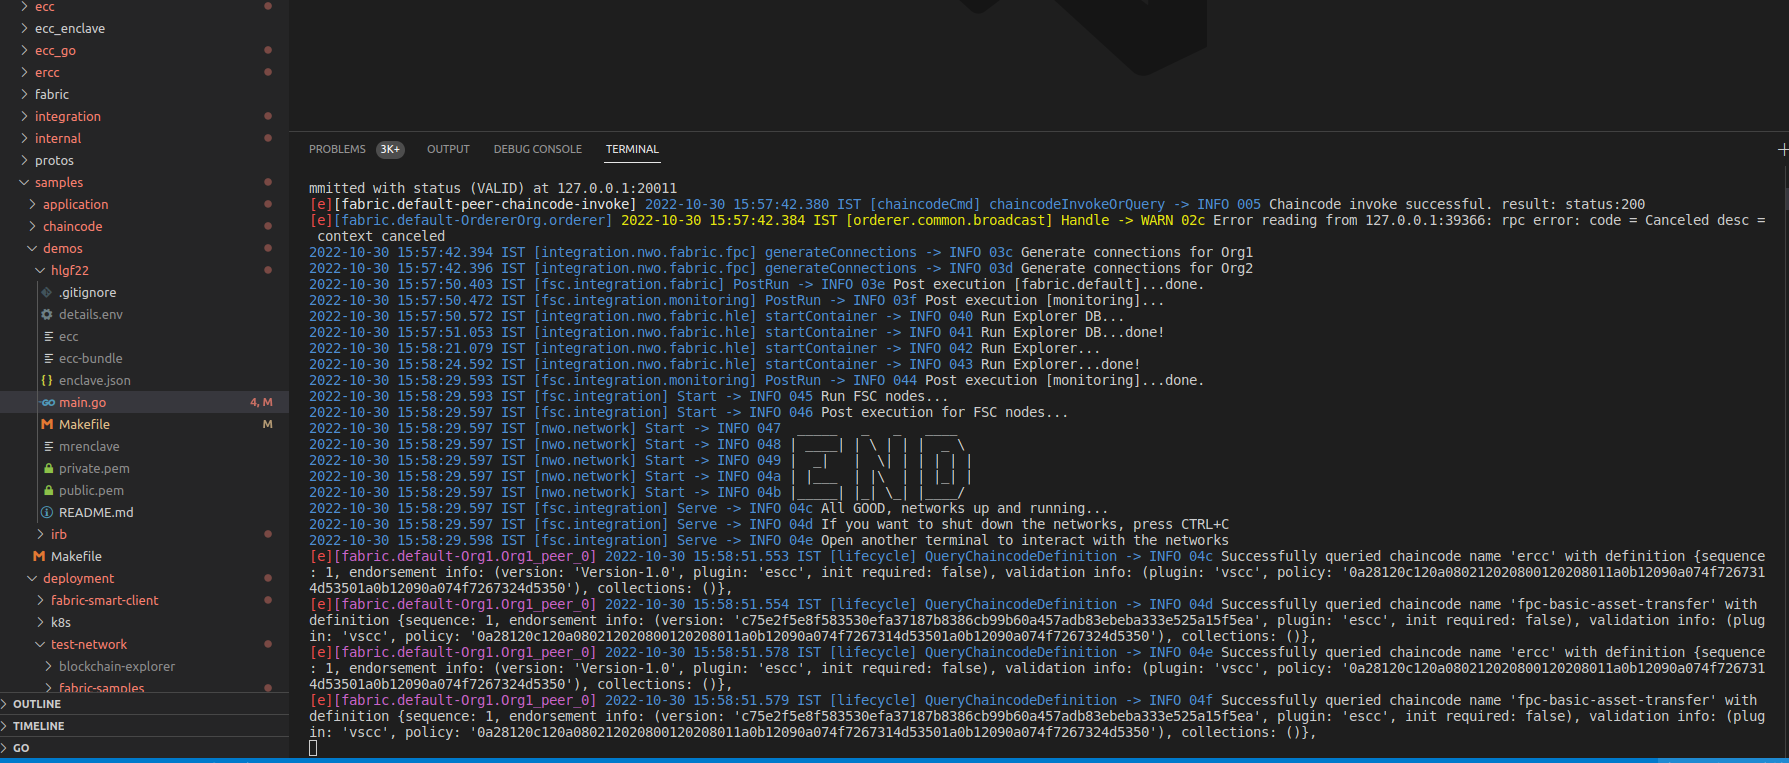

It also start with the hyperledger explorer to see the network and related artifcats and transaction information over the GUI

## To run the Hyperledger-explorer

nce the network is started we can open Hyperledger Explorer in a browser at http://localhost:8080/ with username admin and password admin. We can see that the fpc-basic-asset-transfer chaincode is installed. Moreover, we see the FPC Enclave Registry chaincode is installed as well

In the browser window type: localhost:8080
In the login and password is admin

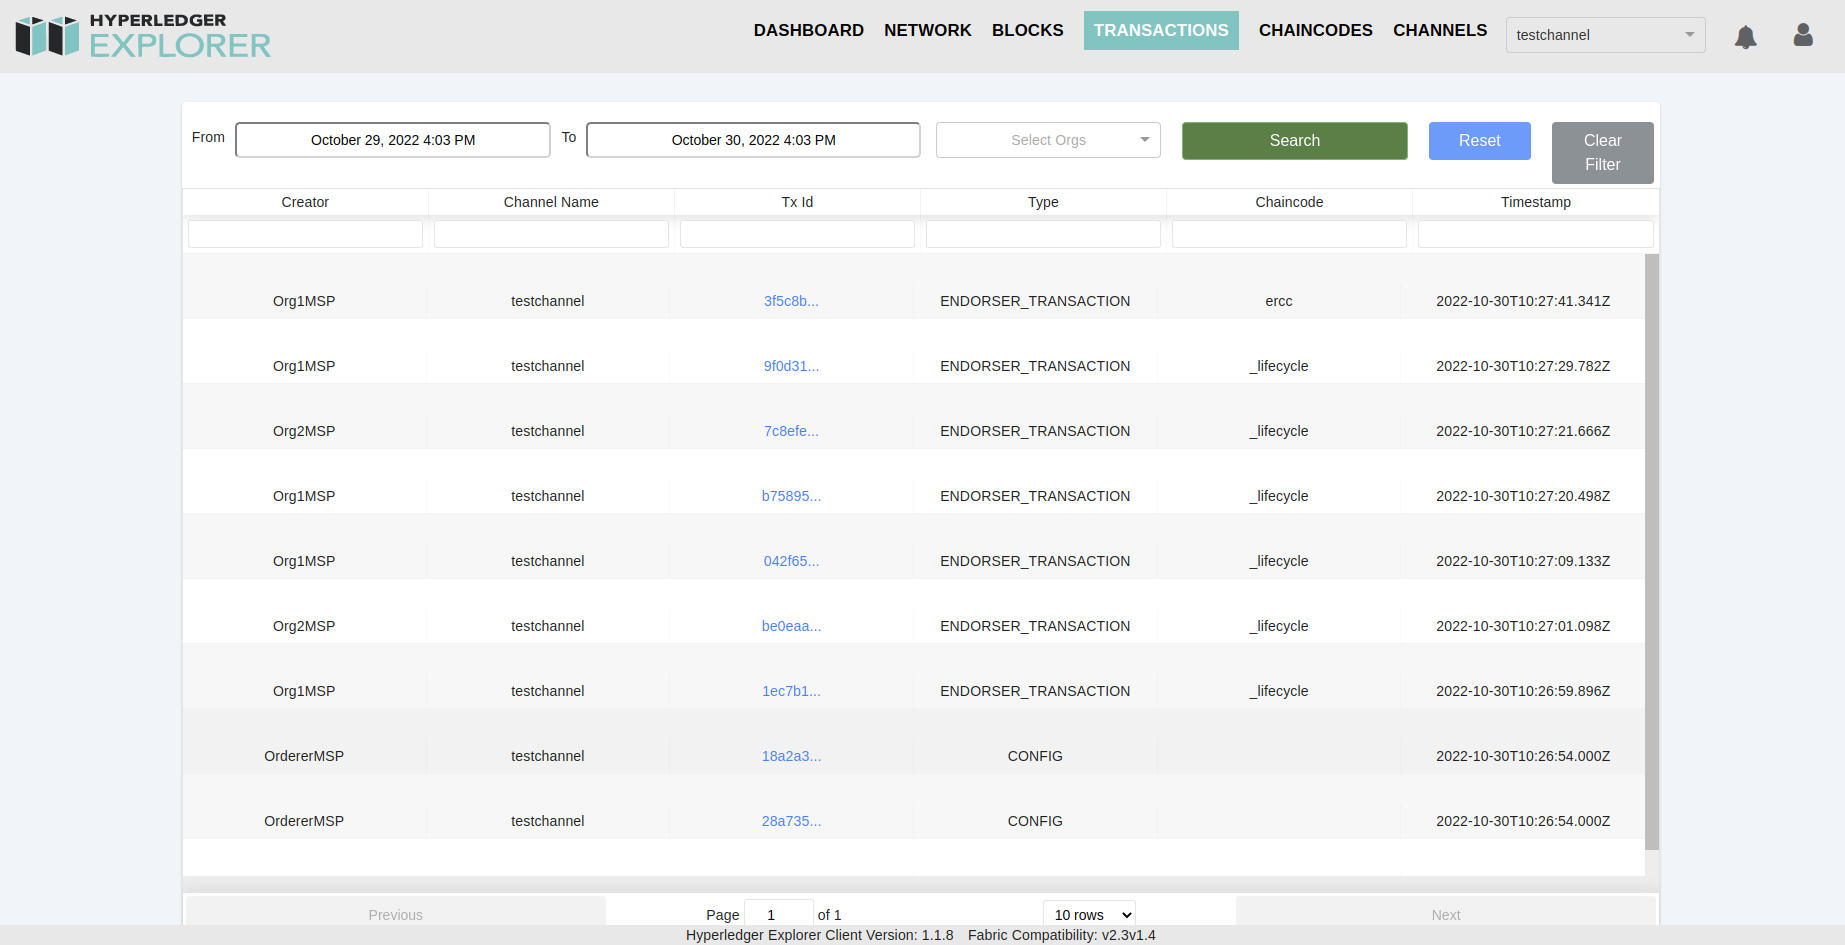

for next step use a new terminal

###  Network interaction: Invoke the chaincode

we will interact with the deployed FPC Chaincode using the 

FPC simple-cli-go.

Open a new terminal and firstly export the variable 

In [ ]:
export FPC_PATH=$GOPATH/src/github.com/hyperledger/fabric-private-chaincode


then Go to 


In [ ]:
cd $FPC_PATH/samples/application/simple-cli-go

run the following:
    


In [ ]:
make

configure cli environment using followings:

In [ ]:
source $FPC_PATH/samples/demos/hlgf22/details.env
$FPC_PATH/samples/deployment/fabric-smart-client/the-simple-testing-network/env.sh Org1


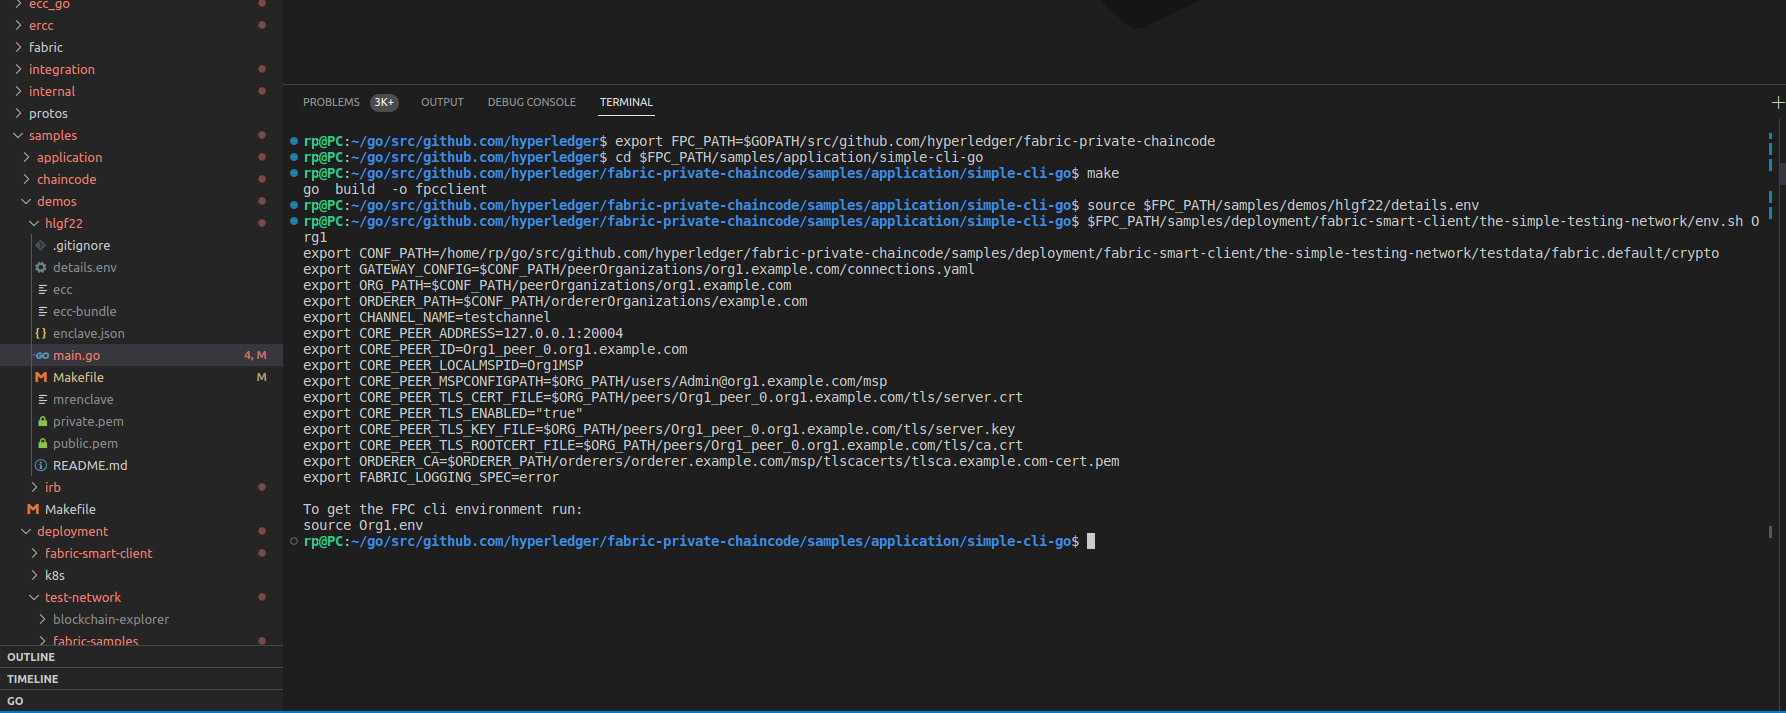

then to get the FPC cli envionrent run the followings:

In [ ]:
source Org1.env

To invoke a predefined asset transaction, use the following command from a terminal

In [ ]:
./fpcclient invoke InitContract

To read external data, query, computeParameters method can be executed from Org1.

to query 

In [ ]:
./fpcclient query readAsset asset1

you will see in the cli terminal window

we can verify the transaction on the transaction history in the hyperledger explorer.

we can see the three transactio on the chaincode

To access Org2, open another terminal and set the enviornment for the Org2 clientside using folliwing commands:

In [ ]:
source $FPC_PATH/samples/demos/hlgf22/details.env
$FPC_PATH/samples/deployment/fabric-smart-client/the-simple-testing-network/env.sh Org2
source Org2.env

About network you can look into the transaction and chaincode. If you look inside the transaction then you can also see that the FPC hide the transaction data( not human readable).

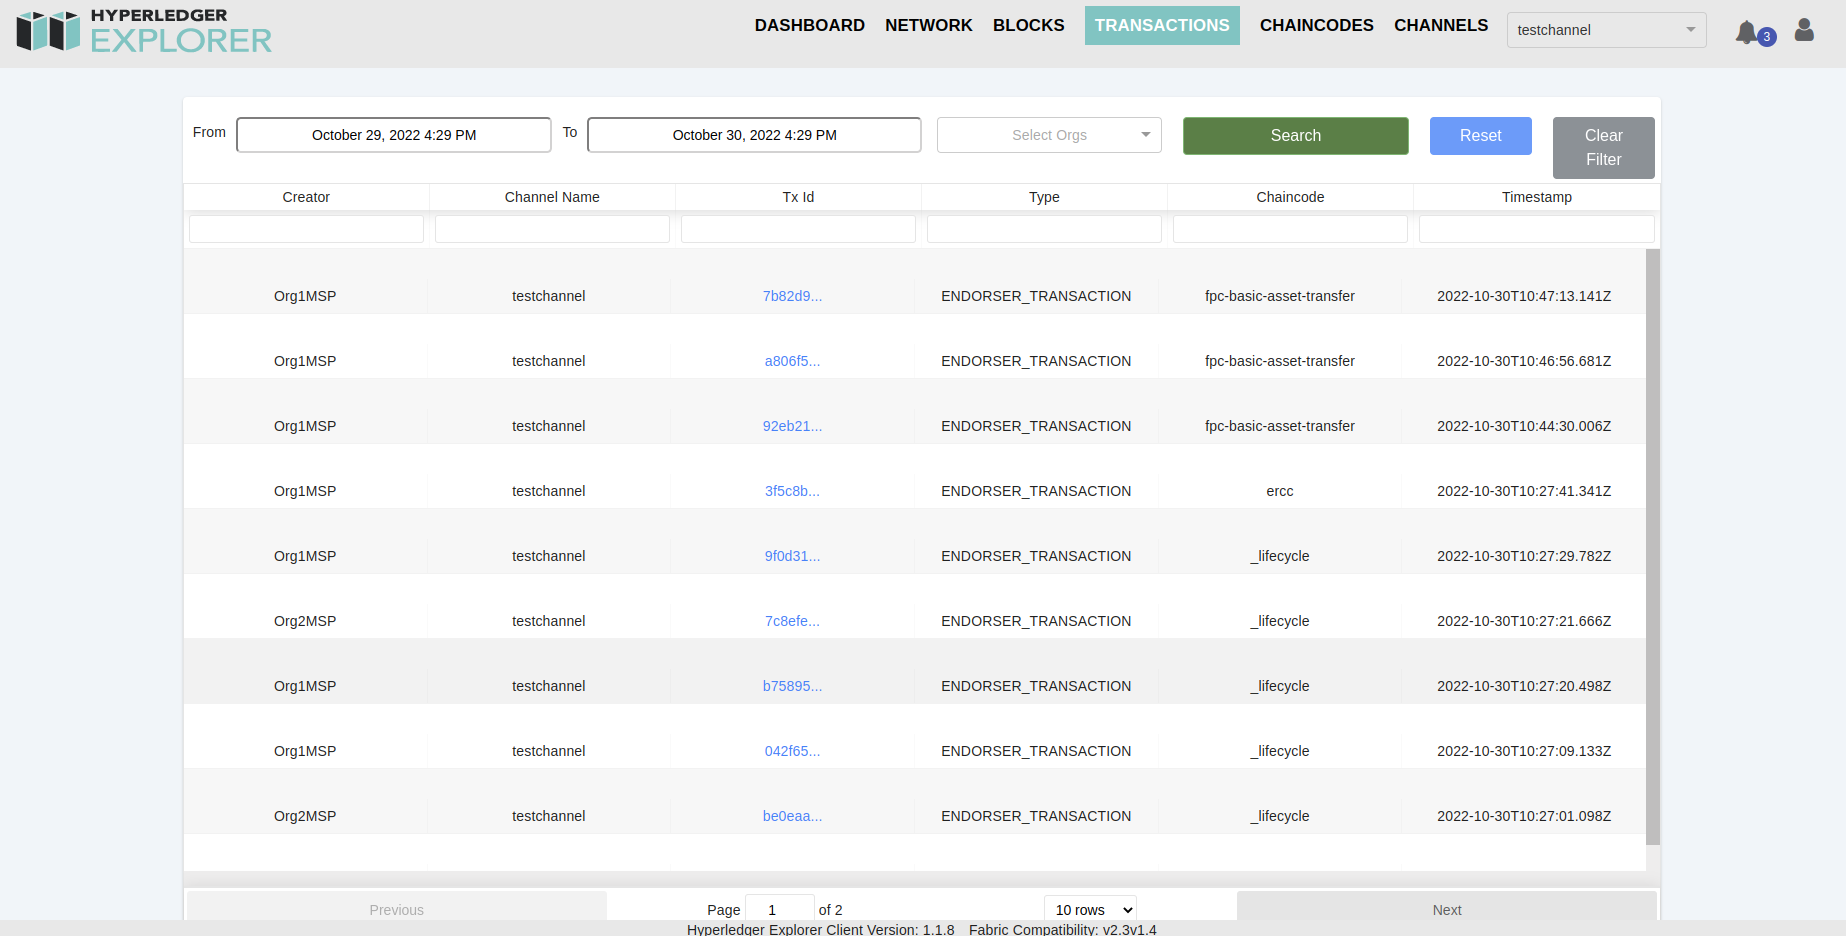